> From https://www.kaggle.com/code/inversion/run-length-decoding-quick-start

In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import numpy as np
import pandas as pd 
from skimage.io import imread
import matplotlib.pyplot as plt
from utils.helpers import rle_decode

data_dir = '../../data/'

# Print available data

In [6]:
# Number of training samples
train = os.listdir(data_dir + 'train_v2')
print(f"Num of training samples: {len(train)}")

# Number of test samples
test = os.listdir(data_dir + 'test_v2')
print(f"Num of test samples: {len(test)}")

# Example of kaggle submission
submission = pd.read_csv(data_dir + 'sample_submission_v2.csv')
print("\nExample of kaggle submission:")
submission.head()

Num of training samples: 192556
Num of test samples: 15606

Example of kaggle submission:


,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2


In [7]:
# Ground truth data
masks = pd.read_csv(data_dir + 'train_ship_segmentations_v2.csv')
print("\nGround truth data")
masks.head()


Ground truth data


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


<br> 

# Run-length encoding example

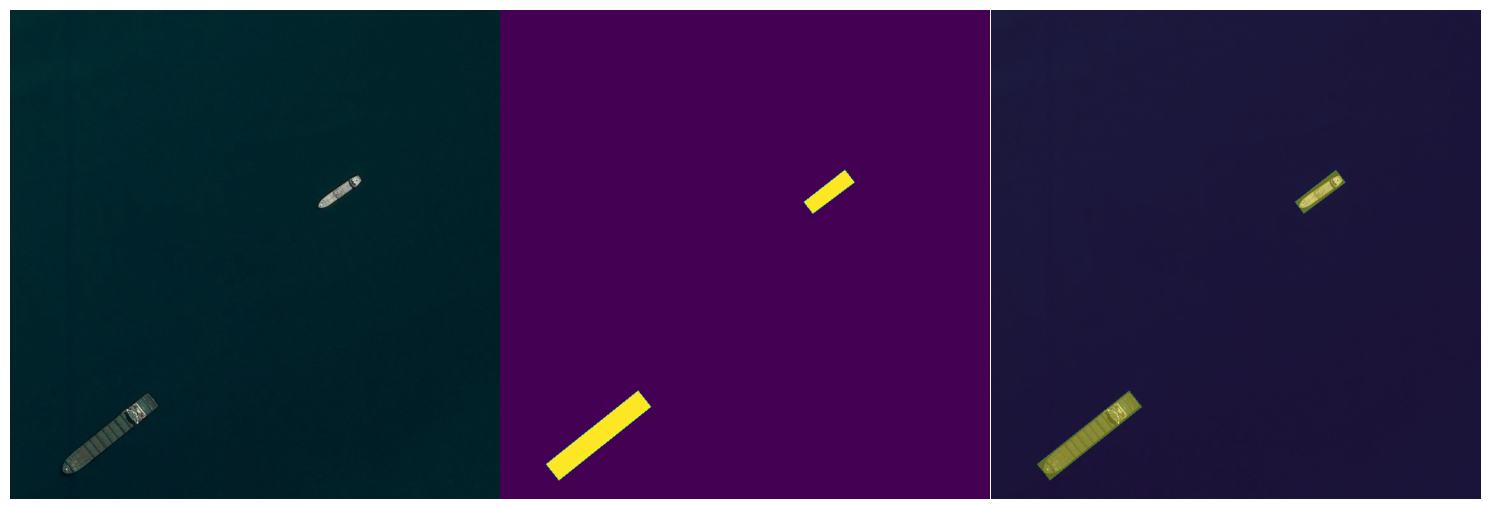

In [8]:
# There are two entries in the CSV for the following images (2 masks)
ImageId = '0005d01c8.jpg'
img = imread(data_dir + 'train_v2/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships in the image
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

# View images
fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

---------------------------

# RLE Analysis

Analyzing the rle function for only 1 ship

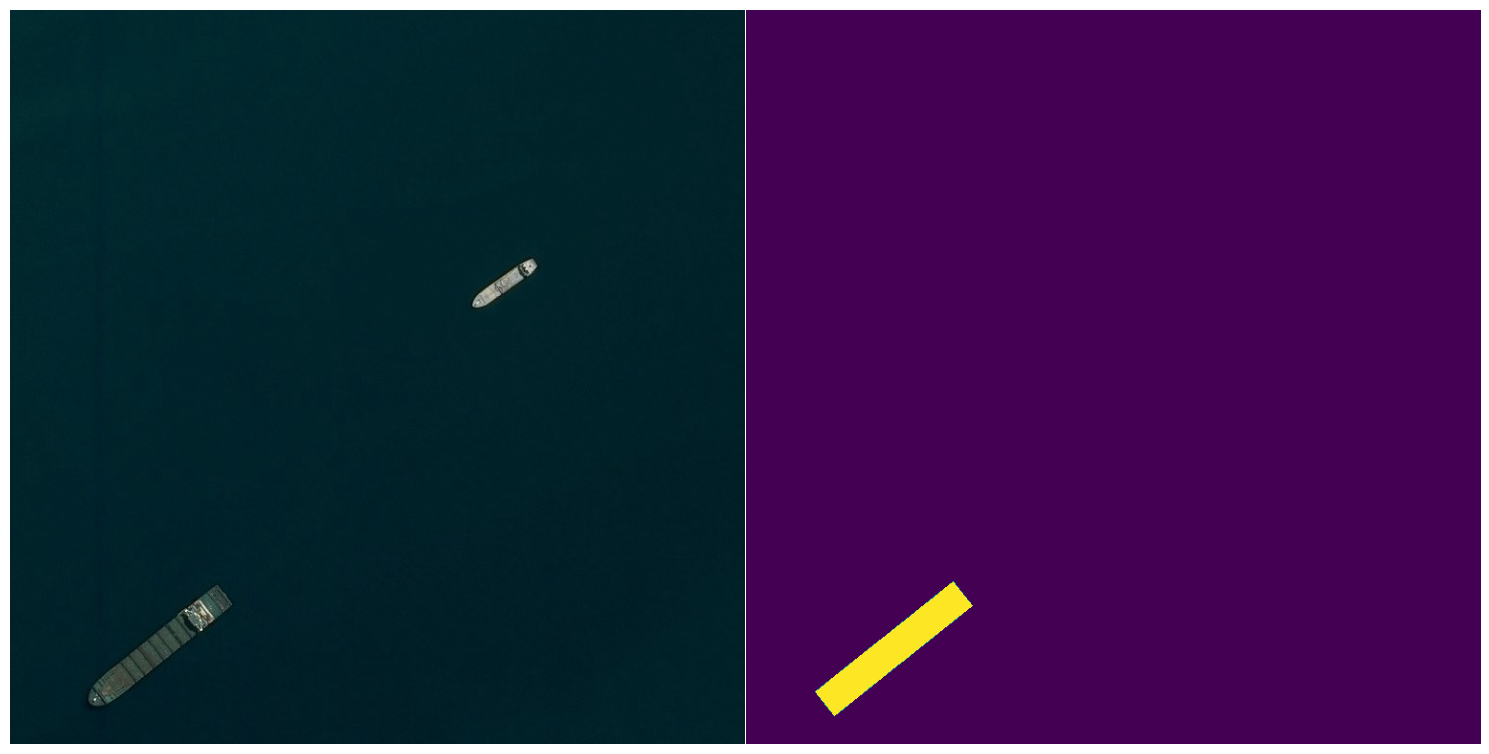

In [9]:
# There are two entries in the CSV for the following images (2 masks)
ImageId = '0005d01c8.jpg'
img2 = imread(data_dir + 'train_v2/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()




mask_rle = img_masks[0]
shape=(768, 768)

s = mask_rle.split()
starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
starts -= 1
ends = starts + lengths

img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
for lo, hi in zip(starts, ends):
    img[lo:hi] = 1

res = img.reshape(shape).T  # Needed to align to RLE directions


# View images
fig, axarr = plt.subplots(1, 2, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].imshow(img2)
axarr[1].imshow(res)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

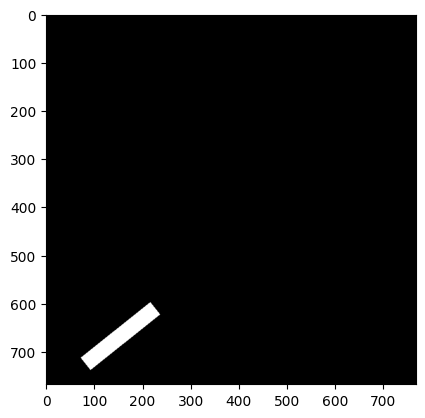

In [12]:
from utils.helpers import masks_as_image

# mask = masks_as_image(img_masks)
mask = masks_as_image([mask_rle])
plt.imshow(mask, cmap="gray")